Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Редко, кто сдает эту работу с первого раза, молодец!
* Проект может быть зачтен, но я его отправлю назад, чтобы у тебя была возможность задать вопросы и внести правки, при желании. Однако, ты можешь просто вернуть проект в таком же виде и я его зачту.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины компании «ГлавРосГосНефть».

__Описание проекта:__ Нужно решить, где бурить новую скважину.
Шаги для выбора локации обычно такие:

    В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
    Строят модель для предсказания объёма запасов в новых скважинах;
    Выбирают скважины с самыми высокими оценками значений;
    Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

__Цель исследования:__ Выбрать на основе лучших месторождений регион для новой скважины компании «ГлавРосГосНефть».

__Ход исследования__ Исследование включает в себя следующие этапы:

Подготовка данных на представленных датасетах 
Обучение линейной модели 
Расчитать риски и прибыль для каждого региона

__Содержание__

1. [Загрузка и подготовка данных](#1) 
2. [Обучение и проверка модели](#2) 
3. [Подготовка к расчёту прибыли](#3)
4. [Расчёт прибыли и рисков](#4)
5. [Чек-лист готовности проекта](#5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

RANDOM_STATE = 42

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
def data_exploration_func(df):
    print('=========================')
    print('Датасет', df.name)
    display(df.head(10))
    df.info()
    display(df.describe(include='all')) 

In [3]:
def num_func(df):
    numeric_cols = df.select_dtypes(include='number').columns

    num_plots = len(numeric_cols)
    plt.figure(figsize=(10, 5 * num_plots))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(num_plots, 2, 2*i + 1)
        df[col].hist(bins=15)
        plt.title(f'Гистограмма для {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.subplot(num_plots, 2, 2*i + 2)
        df.boxplot(column=col)
        plt.title(f'Диаграмма размаха {col}')
        
    plt.tight_layout()
    plt.show()

<a id="1"></a>
## Загрузка и подготовка данных

In [4]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')
df_list = [geo_data_0,geo_data_1,geo_data_2]

In [5]:
geo_data_0.name = 'geo_data_0'
geo_data_1.name = 'geo_data_1'
geo_data_2.name = 'geo_data_2'

In [6]:
data_exploration_func(geo_data_0)

Датасет geo_data_0


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,bxg6G,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


In [7]:
data_exploration_func(geo_data_1)

Датасет geo_data_1


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,5ltQ6,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


In [8]:
data_exploration_func(geo_data_2)

Датасет geo_data_2


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,Vcm5J,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


In [9]:
for data in df_list:
    display(data.name)
    display(data.isna().sum())

'geo_data_0'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'geo_data_1'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'geo_data_2'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропущенных значений нет

Проверка на дубликаты

In [10]:
for i in df_list:
    i.duplicated().sum()
    print(f'Количество дубликатов {i.name}= {i.duplicated().sum()}')

Количество дубликатов geo_data_0= 0
Количество дубликатов geo_data_1= 0
Количество дубликатов geo_data_2= 0


Дубликатов нет

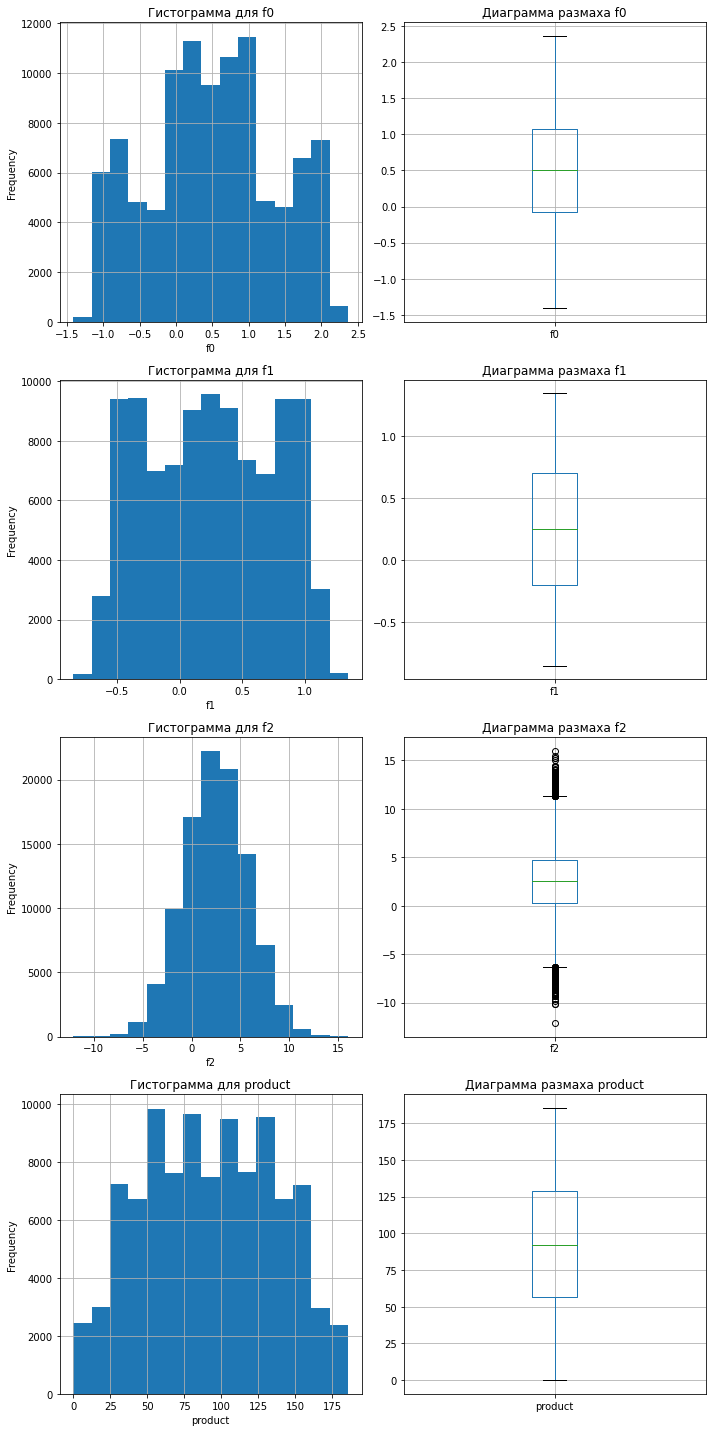

In [11]:
num_func(geo_data_0)

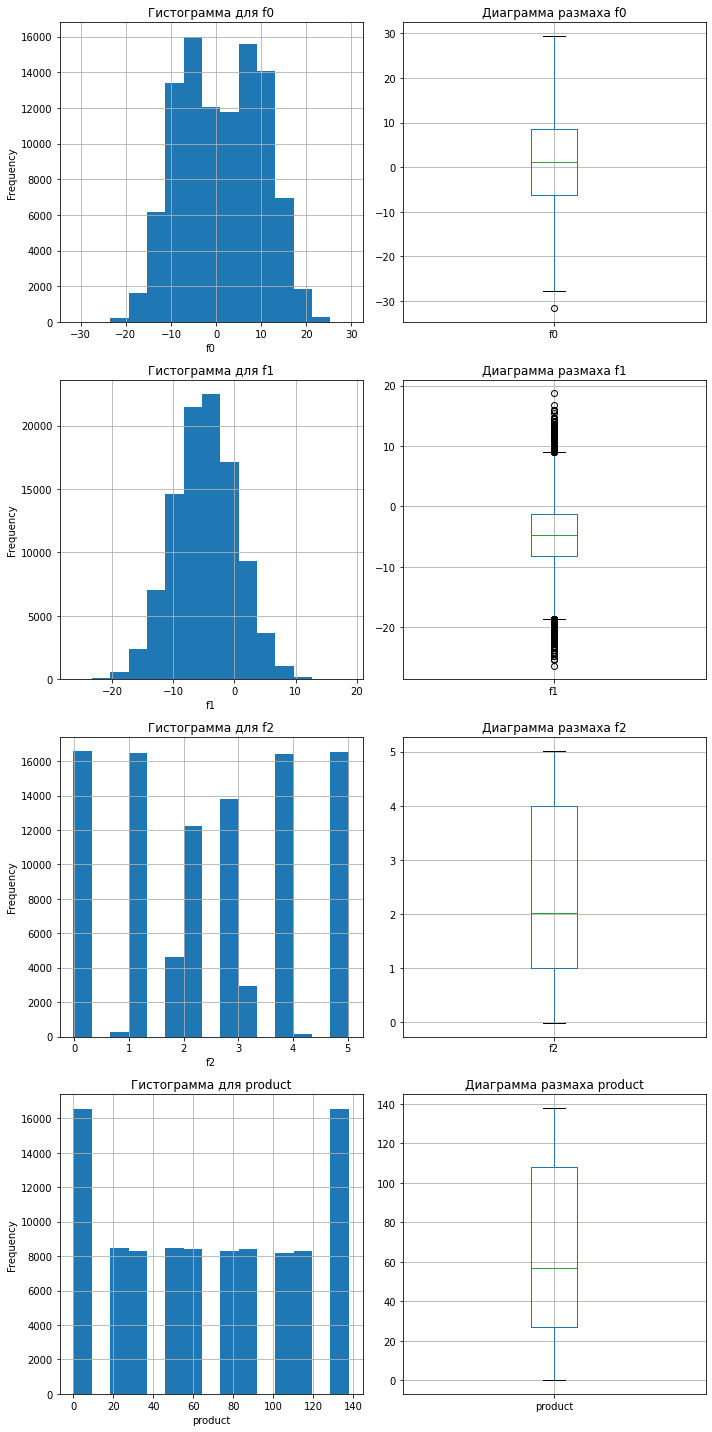

In [12]:
num_func(geo_data_1)

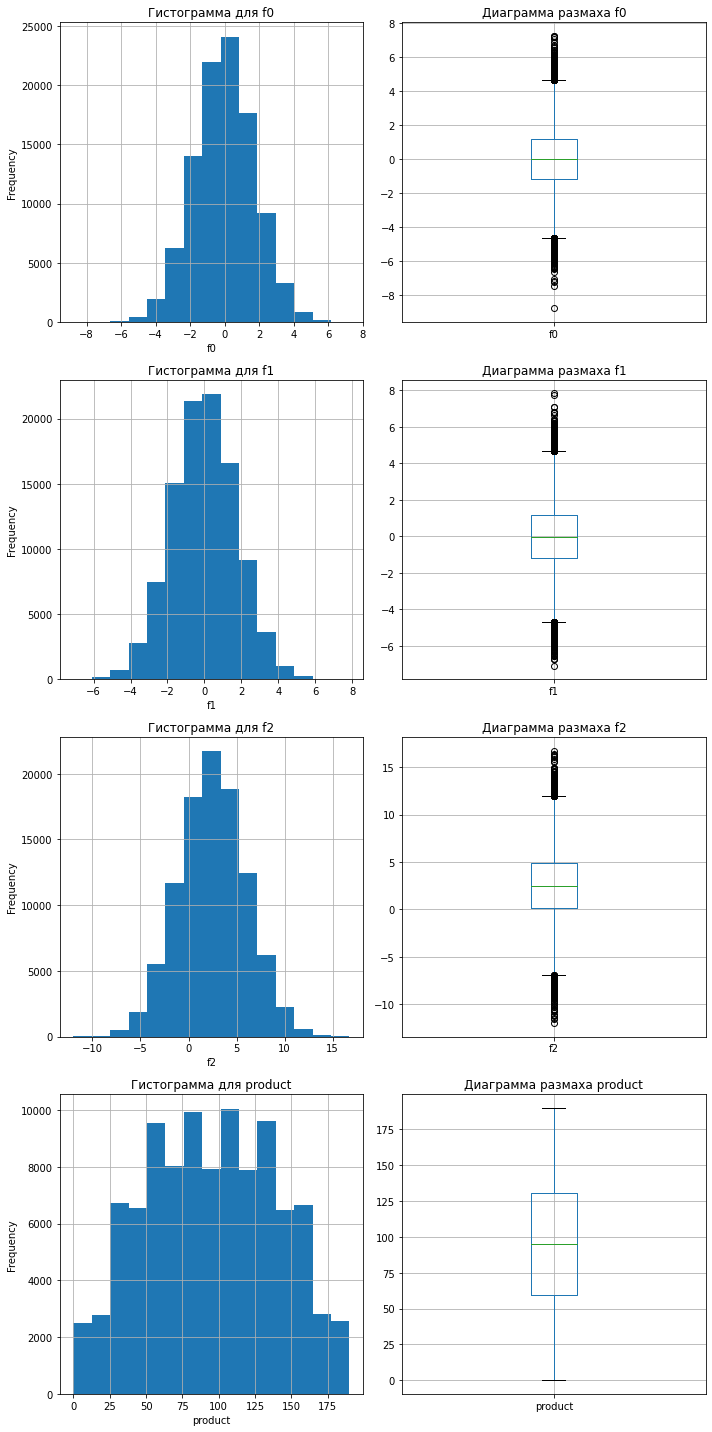

In [13]:
num_func(geo_data_2)

Вывод: мы подготовили данные, можно приступать к обучению модели.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения и корреляции были визуализированы!
</div>

<a id="2"></a> 
## Обучение и проверка модели

In [14]:
def line_model(data):
    target = data['product']
    features = data.drop(['product', 'id'], axis=1)
    
    features_train, features_valid, target_train,target_valid = \
    train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    
    # посчитаем средний запас сырья
    predicted_valid_mean = predicted_valid.sum()/len(predicted_valid)
    
    return target_valid, predicted_valid, rmse, predicted_valid_mean

In [15]:
target_valid_0, predicted_valid_0, rmse_0, predicted_valid_mean_0 = line_model(geo_data_0)
target_valid_1, predicted_valid_1, rmse_1, predicted_valid_mean_1 = line_model(geo_data_1)
target_valid_2, predicted_valid_2, rmse_2, predicted_valid_mean_2 = line_model(geo_data_2)

In [16]:
print('Регион_0. Средний запас сырья:', predicted_valid_mean_0, 'rmse:', rmse_0)
print('Регион_1. Средний запас сырья:', predicted_valid_mean_1, 'rmse:', rmse_1)
print('Регион_2. Средний запас сырья:', predicted_valid_mean_2, 'rmse:', rmse_2)

Регион_0. Средний запас сырья: 92.39879990657768 rmse: 37.75660035026169
Регион_1. Средний запас сырья: 68.71287803913762 rmse: 0.890280100102884
Регион_2. Средний запас сырья: 94.77102387765939 rmse: 40.145872311342174


Вывод:
 
- В нулевом регионе ошибка предсказаний самая маленькая, но по среднему объему запасов он на втором месте - 93 тыс. баррелей. В первом регионе ошибка RMSE - 37.

- Наиболее точно модель предсказала запасы в первом регионе (RMSE - 0.88). Несмотря на высокую точность, первый регион имеет малый средний запас нефти - 69 тыс. баррелей, что делает его менее привлекательным для инвестиций.

- Второй регион показывает наиболее высокое предсказанное среднее значение объема запасов нефти - 95 тыс. баррелей, но также имеет самую высокую ошибку предсказаний (RMSE) - 40, что делает его рискованным.

Таким образом, Первый регион является самым предсказуемым и стабильным, но с низкими доходами. Второй регион наиболее перспективен с точки зрения возможной прибыли, несмотря на высокий риск. Нулевой регион менее привлекателен как по ошибке предсказаний, так и по среднему объему запасов нефти.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

<a id="3"></a> 
## Подготовка к расчёту прибыли

In [17]:
BUDGET_PER_REGION = 10*(10**9)
PRE_MAX_POINTS = 500
FINAL_MAX_POINTS = 200
PRODUCT_UNITS_INCOME_RUB = 450000
DAMAGE_THRESHOLD =  0.025
NON_DAMAGE_POINT = BUDGET_PER_REGION / PRODUCT_UNITS_INCOME_RUB  / FINAL_MAX_POINTS

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что в названиях константных переменных использовались только большие буквы!
</div>

In [18]:
print("Достаточный объем добычи для безубыточной разработки =",round(NON_DAMAGE_POINT,2), "единиц продукта (тыс. баррелей)")

Достаточный объем добычи для безубыточной разработки = 111.11 единиц продукта (тыс. баррелей)


Разница между объемами добычи, требуемыми для безубыточности проекта и средними значениями предсказанных объемов добычи нефти во всех скважинах разных регионов.

In [19]:
print("Регион_0 =", predicted_valid_mean_0 - NON_DAMAGE_POINT)

Регион_0 = -18.712311204533435


In [20]:
print("Регион_1 =", predicted_valid_mean_1 - NON_DAMAGE_POINT)

Регион_1 = -42.39823307197349


In [21]:
print("Регион_2 =", predicted_valid_mean_2 - NON_DAMAGE_POINT)

Регион_2 = -16.340087233451726


Разница между объемами добычи, требуемыми для безубыточности проекта и средними значениями объемов добычи нефти в 200 скважинах с предсказанным максимальным объемом в разных регионов.

In [22]:
pd.Series(predicted_valid_0).sort_values(ascending=False).head(200).mean() - NON_DAMAGE_POINT

43.29620532962383

In [23]:
pd.Series(predicted_valid_1).sort_values(ascending=False).head(200).mean() - NON_DAMAGE_POINT

27.632645722211976

In [24]:
pd.Series(predicted_valid_2).sort_values(ascending=False).head(200).mean() - NON_DAMAGE_POINT

37.53312793016613

__Вывод:__ Для безубыточности проекта минимальный объем добычи в одной скважине должен быть не менее 111 тыс. баррелей.
Во всех регионах средние предсказанные значения объемов добычи нефти в одной сважине меньше минимум на 16 тыс. баррелей, чем требуется для безубыточности проекта. Средние значения 200 скважин с максимальным предсказанным объемом нефти во всех регионах превышают точку безубыточности. Лидирует первый регион с превышением в 44,4 тыс. баррелей.


<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

Напишем функцию для расчёта прибыли

In [25]:
def total_income(target, probabilities, count, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB):
    prob_sort = probabilities.sort_values(ascending=False)
    selected = target[prob_sort.index][:count]
    return int(PRODUCT_UNITS_INCOME_RUB * selected.sum() - REGION_BUDGET_RUB)

<a id="4"></a> 
## Расчёт прибыли и рисков 

In [26]:
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

In [27]:
target_valid_0, predicted_valid_0 = series_type(target_valid_0, predicted_valid_0)
target_valid_1, predicted_valid_1 = series_type(target_valid_1, predicted_valid_1)
target_valid_2, predicted_valid_2 = series_type(target_valid_2, predicted_valid_2)

In [28]:
def bootstrap_regions(target, predicted, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB):
    state = RandomState(12345)
    values = []
    lost =0
    for i in range(1000):
        target_subsample = target.sample(n = PRE_MAX_POINTS, replace=True, random_state=state)
        pred_subsumple = predicted[target_subsample.index]
        profit = total_income(target_subsample, pred_subsumple, SELECTED_QUANTITY_POINTS, PRODUCT_UNITS_INCOME_RUB, REGION_BUDGET_RUB)
        if profit < 0:
            lost +=1
            
        values.append(profit)
    values = pd.Series(values)
    values_mean = int(values.mean())
    lower = int(values.quantile(q=0.025))
    upper = int(values.quantile(q=0.975))
    risk = lost / 1000
    return values_mean, lower, upper, risk

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

In [29]:
values_mean_0, lower_0, upper_0, risk_0  = bootstrap_regions(target_valid_0, predicted_valid_0, FINAL_MAX_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET_PER_REGION)
values_mean_1, lower_1, upper_1, risk_1  = bootstrap_regions(target_valid_1, predicted_valid_1, FINAL_MAX_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET_PER_REGION)
values_mean_2, lower_2, upper_2, risk_2  = bootstrap_regions(target_valid_2, predicted_valid_2, FINAL_MAX_POINTS, PRODUCT_UNITS_INCOME_RUB, BUDGET_PER_REGION)

In [30]:
print('Данные по нулевому региону.')
print('Средняя прибыль по региону = {:.0f} руб.'.format(values_mean_0))
print('95% доверительный интервал от {:.0f} до {:.0f} руб.'.format(lower_0, upper_0))
print('Процент риска {:.1%}'.format(risk_0))

Данные по нулевому региону.
Средняя прибыль по региону = 435933771 руб.
95% доверительный интервал от -116231612 до 966504179 руб.
Процент риска 6.1%


In [31]:
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.0f} руб.'.format(values_mean_1))
print('95% доверительный интервал от {:.0f} до {:.0f} руб.'.format(lower_1, upper_1))
print('Процент риска {:.1%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль по региону = 489661253 руб.
95% доверительный интервал от 55116176 до 905762649 руб.
Процент риска 1.1%


In [32]:
print('Данные по второму региону.')
print('Средняя прибыль по региону = {:.0f} руб.'.format(values_mean_2))
print('95% доверительный интервал от {:.0f} до {:.0f} руб.'.format(lower_0, upper_0))
print('Процент риска {:.1%}'.format(risk_2))

Данные по второму региону.
Средняя прибыль по региону = 403687927 руб.
95% доверительный интервал от -116231612 до 966504179 руб.
Процент риска 7.1%


В рамках исследования выполнена всесторонняя работа по анализу данных и моделированию для выбора наилучшего региона для разработки нефтяных месторождений. Были изучены данные и подготовлены к моделированию, обучены модели для каждого региона, рассчитаны показатели прибыли и риски. Результаты показали следующее:

- Нулевой регион демонстрирует среднюю прибыль лучших месторождений 425,94 млн рублей с риском убытков 6%.
- Средня прибыль лучших месторождений первого региона составляет 515,22 млн рублей при риске убытков всего 1%, что значительно лучше показателей других регионов.
- Второй регион показывает среднюю прибыль лучших месторождений 435,01 млн рублей, но риск убытков также составляет 6,4%.

Таким образом, первый регион рекомендован для дальнейшего освоения и разработки.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта! С выбором региона согласен.
</div>

<a id="5"></a> 
## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

In [33]:
print("Проверка на работоспособность кода")

Проверка на работоспособность кода
